## Regression Logistique (Logistic Regression)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv ('diabetes.csv')
data.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
def featrue_standard (data) :
    d_mean = np.mean (data, axis = 0)
    d_std = np.std (data, axis = 0)
    data_scaled = (data - d_mean) / d_std
    return data_scaled

In [32]:
standard_data = featrue_standard (data)
data.iloc [:, 0:-1] = standard_data.iloc [:, 0:-1]

In [33]:
def split_data (df, train_persent) :
    np.random.seed (0)
    perm = np.random.permutation (df.index)
    n = len (df)
    
    train_index = int (train_persent * n)
    train = df.iloc [perm [:train_index]]
    test = df.iloc [perm [train_index:]]
    
    x_train = train.iloc [:, :-1]
    y_train = train.iloc [:, -1]
    
    x_test = test.iloc [:, :-1]
    y_test = test.iloc [:, -1]
    
    return x_train.values, x_test.values, y_train.values, y_test.values

In [34]:
x_train, x_test, y_train, y_test = split_data (data, 0.8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Logistic regression from Scratch

In [47]:
class LogisticRegression :
    def __init__ (self, epochs = 100, threshold = 0.5, tolerance = 1e-10, lr = 0.0001) :
        self.epochs = epochs
        self.threshold = threshold
        self.tolerance = tolerance
        self.lr = lr
        self.theta = None
        
    def add_ones (self, x) :
        x_new = np.hstack ([np.ones ((x.shape [0], 1)), x])
        return x_new
    
    def sigmoid (self, x, theta) :
        h = x@self.theta
        return 1 / (1 + np.exp (- h))
    
    def cross_entropy (self, x, y_true) :
        n = len (x) # Taille des features
        y_pred = self.sigmoid (x, self.theta)
        cost = - ((y_pred.T@np.log (y_pred)) + (1 - y_true.T)@np.log (1 - y_pred)) / n
        return cost [0]
    
    def fit (self, x, y) :
        x = self.add_ones (x)
        y = y.reshape (-1, 1)
        self.theta = np.zeros ((x.shape [1], 1)) # Initialisation de theat avec le vecteur null
        current_iter = 1
        norm = 1
        
        self.cost_history = []
        self.cost_history_test = []
        
        while (norm >= self.tolerance and current_iter < self.epochs) :
            theta_old = self.theta.copy ()
            
            # Faire une pédiction 
            y_pred = self.sigmoid (x, self.theta)

            # Gradient
            grad = -x.T@((y.reshape (-1, 1) - y_pred.reshape (-1, 1)))
            grad = grad.reshape (-1, 1) # On le fait si besoin puisque nous le faisons from scratch sans connaitre les dimensions encore
            
            # Update rules
            theta_new = theta_old - self.lr * grad
            self.theta = theta_new
            
            # Calculer les erreurs d'entrainement et de test
            self.cost_history.append (self.cross_entropy (x, y))
            self.cost_history_test.append (self.cross_entropy (self.add_ones (x_test), y_test))
            
            # Critère de convergence
            if current_iter % 100 == 0 :
                print (f'cost for {current_iter} iteration : {self.cross_entropy (x, y)}')
            
            # Icrémentation des paramètres de la boucle
            norm = np.linalg.norm (theta_old - self.theta)
            current_iter += 1
            
    def predict_proba (self, x) :
        x = self.add_ones (x)
        y_pred = self.sigmoid (x, self.theta)
        return y_pred
    
    def predict (self, x) :
        proba = self.predict_proba (x)
        result = [1 if i > self.threshold else 0 for i in proba] # Convertir les probabilités en 0 et 1
        return np.array (result)
    
    def plot (self) :
        plt.figure (figsize = (10, 6))
        plt.style.use ('ggplot')
        plt.plot (self.cost_history, label = 'Train Loss')
        plt.plot (self.cost_history_test, label = 'Test Loss')
        plt.legend (loc = 'upper right')
        plt.show

In [53]:
model = LogisticRegression (epochs = 1000, lr = 0.00000019)

In [54]:
# Train model
model.fit (x_train, y_train)

cost for 100 iteration : [0.79146815]
cost for 200 iteration : [0.7904514]
cost for 300 iteration : [0.78944047]
cost for 400 iteration : [0.78843529]
cost for 500 iteration : [0.78743583]
cost for 600 iteration : [0.78644202]
cost for 700 iteration : [0.78545384]
cost for 800 iteration : [0.78447122]
cost for 900 iteration : [0.78349411]


In [55]:
# Test model
model.predict (x_test)

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

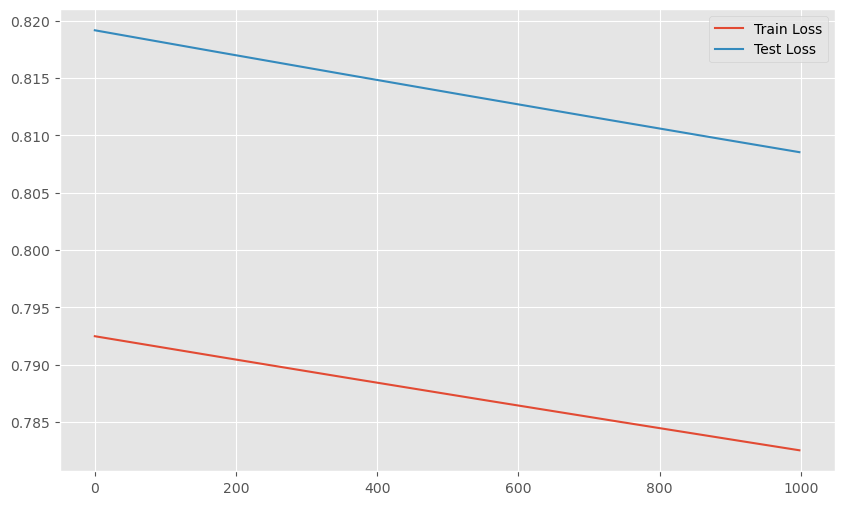

In [56]:
model.plot ()